Iris classification model

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=pd.read_csv('iris_dataset.csv')

In [22]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
print(data['species'].unique())

['setosa' 'versicolor' 'virginica']


In [25]:
df0 = data[:50]
df1 = data[50:100]
df2 = data[100:]

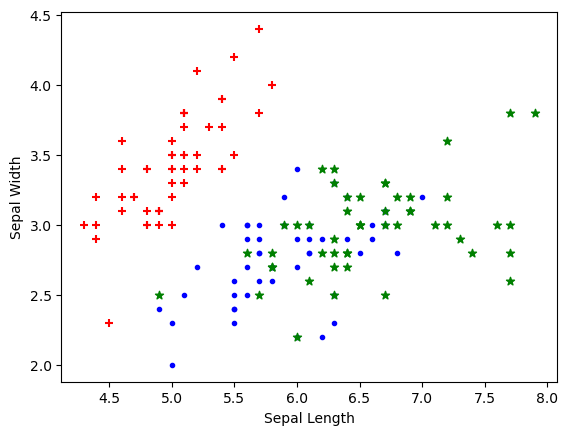

In [26]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0['sepal_length'], df0['sepal_width'], color = "red", marker="+")
plt.scatter(df1['sepal_length'], df1['sepal_width'], color = "blue", marker=".")
plt.scatter(df2['sepal_length'], df2['sepal_width'], color = "green", marker="*")

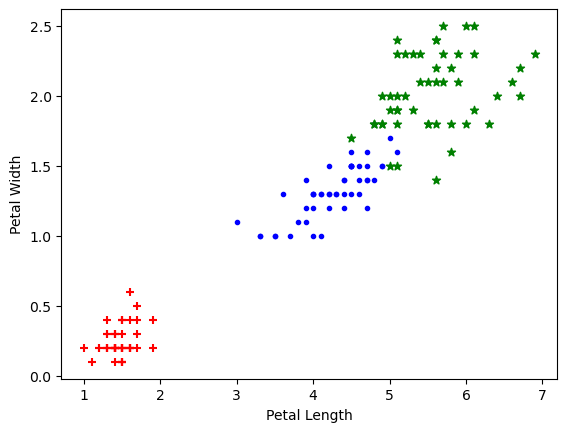

In [27]:
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(df0['petal_length'], df0['petal_width'], color = "red", marker="+")
plt.scatter(df1['petal_length'], df1['petal_width'], color = "blue", marker=".")
plt.scatter(df2['petal_length'], df2['petal_width'], color = "green", marker="*")

classification

In [28]:

mappings = {'setosa':0 , 'versicolor':1 , 'virginica':2 }
data['Classification'] = data['species'].map(mappings)

In [29]:
from sklearn.model_selection import train_test_split
x = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['Classification']
x_train, x_test , y_train , y_test = train_test_split(x,y,train_size=.3)

modeling

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)

In [39]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [40]:
knn.score(x_test, y_test)

0.9714285714285714

In [ ]:
# knn.score(x_test, y_test)

metrics / accuracy calculation

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
y_pred=knn.predict(x_test)
matrix=confusion_matrix(y_test, y_pred)

In [43]:
matrix

array([[41,  0,  0],
       [ 0, 33,  2],
       [ 0,  1, 28]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

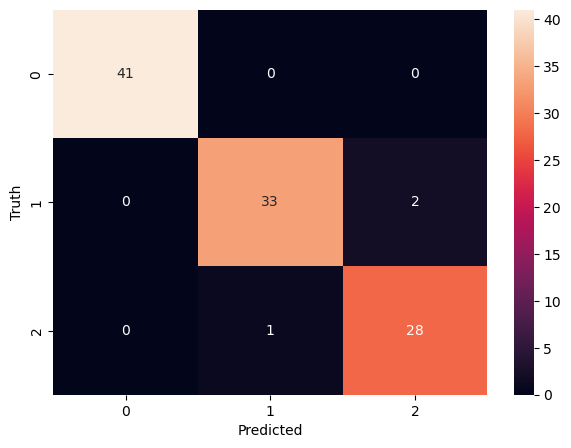

In [44]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.97      0.94      0.96        35
           2       0.93      0.97      0.95        29

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

